In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
from collections import deque
from sklearn import preprocessing
import random

In [ ]:
data = pd.read_csv('/content/original_result.csv')
data.head()
main_dataframe = data.transpose()
main_dataframe.head()
column_name = main_dataframe.iloc[0]
main_dataframe = main_dataframe[1:]
main_dataframe.columns = column_name

indexes = [item for item in range(0,5760)]
main_dataframe.index=indexes
main_dataframe = main_dataframe.astype(float)

In [ ]:
import pandas as pd

new_dataset = []

# Loop through the rows in steps of 2
for i in range(0, len(main_dataframe), 2):
    if i + 1 < len(main_dataframe):
        # Add the current row and the next row and append to new_rows
        combined_row = main_dataframe.iloc[i] + main_dataframe.iloc[i + 1]
        new_dataset.append(combined_row)

# Create a new DataFrame from the combined rows
new_df = pd.DataFrame(new_dataset)
new_df.head()


operationName,post_storage_read_posts_server,read_home_timeline_server,read_home_timeline_redis_find_client,read_home_timeline_client,/wrk2-api/home-timeline/read,compose_creator_server,compose_media_server,url_mongo_insert_client,compose_urls_server,compose_user_mentions_memcached_get_client,...,write_user_timeline_server,read_user_timeline_redis_find_client,user_timeline_mongo_find_client,user_timeline_redis_update_client,read_user_timeline_server,/wrk2-api/user-timeline/read,ReadUserTimeline,post_storage_mmc_mget_client,mmc_set_client,mongo_find_client
0,39.0,25.0,25.0,25.0,49.0,5.0,5.0,5.0,5.0,5.0,...,5.0,14.0,14.0,1.0,14.0,28.0,14.0,0.0,0.0,0.0
1,34.0,22.0,22.0,22.0,44.0,4.0,4.0,4.0,4.0,4.0,...,4.0,12.0,12.0,0.0,12.0,24.0,12.0,0.0,0.0,0.0
2,33.0,27.0,27.0,27.0,54.0,1.0,1.0,1.0,1.0,1.0,...,1.0,6.0,6.0,1.0,6.0,12.0,6.0,0.0,0.0,0.0
3,34.0,20.0,20.0,20.0,40.0,3.0,3.0,3.0,3.0,3.0,...,3.0,14.0,14.0,0.0,14.0,28.0,14.0,0.0,0.0,0.0
4,45.0,29.0,29.0,29.0,58.0,1.0,1.0,1.0,1.0,1.0,...,1.0,16.0,16.0,0.0,16.0,31.0,16.0,0.0,0.0,0.0


In [ ]:
new_df.replace({0:0.1},inplace=True)
new_df.isin([0]).sum()

operationName
post_storage_read_posts_server                0
read_home_timeline_server                     0
read_home_timeline_redis_find_client          0
read_home_timeline_client                     0
/wrk2-api/home-timeline/read                  0
compose_creator_server                        0
compose_media_server                          0
url_mongo_insert_client                       0
compose_urls_server                           0
compose_user_mentions_memcached_get_client    0
compose_user_mentions_mongo_find_client       0
compose_user_mentions_server                  0
post_storage_mongo_insert_client              0
store_post_server                             0
compose_unique_id_server                      0
get_followers_server                          0
social_graph_redis_get_client                 0
social_graph_mongo_find_client                0
write_home_timeline_redis_update_client       0
write_home_timeline_server                    0
get_followers_client      

In [ ]:
new_df['future'] = new_df['read_home_timeline_server'].shift(-1)

In [ ]:
new_df.head()

operationName,post_storage_read_posts_server,read_home_timeline_server,read_home_timeline_redis_find_client,read_home_timeline_client,/wrk2-api/home-timeline/read,compose_creator_server,compose_media_server,url_mongo_insert_client,compose_urls_server,compose_user_mentions_memcached_get_client,...,read_user_timeline_redis_find_client,user_timeline_mongo_find_client,user_timeline_redis_update_client,read_user_timeline_server,/wrk2-api/user-timeline/read,ReadUserTimeline,post_storage_mmc_mget_client,mmc_set_client,mongo_find_client,future
0,39.0,25.0,25.0,25.0,49.0,5.0,5.0,5.0,5.0,5.0,...,14.0,14.0,1.0,14.0,28.0,14.0,0.1,0.1,0.1,22.0
1,34.0,22.0,22.0,22.0,44.0,4.0,4.0,4.0,4.0,4.0,...,12.0,12.0,0.1,12.0,24.0,12.0,0.1,0.1,0.1,27.0
2,33.0,27.0,27.0,27.0,54.0,1.0,1.0,1.0,1.0,1.0,...,6.0,6.0,1.0,6.0,12.0,6.0,0.1,0.1,0.1,20.0
3,34.0,20.0,20.0,20.0,40.0,3.0,3.0,3.0,3.0,3.0,...,14.0,14.0,0.1,14.0,28.0,14.0,0.1,0.1,0.1,29.0
4,45.0,29.0,29.0,29.0,58.0,1.0,1.0,1.0,1.0,1.0,...,16.0,16.0,0.1,16.0,31.0,16.0,0.1,0.1,0.1,25.0


In [ ]:
def compare(current, future):
    if future > current:
        return 1
    else:
        return 0
# main_dataframe['target'] = list(map(compare, main_dataframe['post_storage_read_posts_server'], main_dataframe['future']))

In [ ]:
new_df.head()

operationName,post_storage_read_posts_server,read_home_timeline_server,read_home_timeline_redis_find_client,read_home_timeline_client,/wrk2-api/home-timeline/read,compose_creator_server,compose_media_server,url_mongo_insert_client,compose_urls_server,compose_user_mentions_memcached_get_client,...,read_user_timeline_redis_find_client,user_timeline_mongo_find_client,user_timeline_redis_update_client,read_user_timeline_server,/wrk2-api/user-timeline/read,ReadUserTimeline,post_storage_mmc_mget_client,mmc_set_client,mongo_find_client,future
0,39.0,25.0,25.0,25.0,49.0,5.0,5.0,5.0,5.0,5.0,...,14.0,14.0,1.0,14.0,28.0,14.0,0.1,0.1,0.1,22.0
1,34.0,22.0,22.0,22.0,44.0,4.0,4.0,4.0,4.0,4.0,...,12.0,12.0,0.1,12.0,24.0,12.0,0.1,0.1,0.1,27.0
2,33.0,27.0,27.0,27.0,54.0,1.0,1.0,1.0,1.0,1.0,...,6.0,6.0,1.0,6.0,12.0,6.0,0.1,0.1,0.1,20.0
3,34.0,20.0,20.0,20.0,40.0,3.0,3.0,3.0,3.0,3.0,...,14.0,14.0,0.1,14.0,28.0,14.0,0.1,0.1,0.1,29.0
4,45.0,29.0,29.0,29.0,58.0,1.0,1.0,1.0,1.0,1.0,...,16.0,16.0,0.1,16.0,31.0,16.0,0.1,0.1,0.1,25.0


In [ ]:
new_df.shape

(2880, 47)

In [ ]:
times = sorted(new_df.index.values)

In [ ]:
new_df.shape

(2880, 47)

In [ ]:
len(times)

2880

In [ ]:
int(0.1 * len(times))

288

In [ ]:
last_10pct = sorted(new_df.index.values)[-int(0.1 * len(times))]

In [ ]:
last_10pct

2592

In [ ]:
main_dataframe_test = new_df[(new_df.index >= last_10pct)]
main_dataframe_train = new_df[(new_df.index < last_10pct)]

In [ ]:
len(new_df)

2880

In [ ]:
len(new_df)

2880

In [ ]:
new_df['read_home_timeline_server']

0       25.0
1       22.0
2       27.0
3       20.0
4       29.0
        ... 
2875    21.0
2876    17.0
2877    29.0
2878    22.0
2879    11.0
Name: read_home_timeline_server, Length: 2880, dtype: float64

In [ ]:
new_df['read_home_timeline_server'].pct_change()
new_df.dropna(inplace=True)


In [ ]:
def preprocess_main_dataframe(df):
    for col in df.columns:
        if col != 'target':
            df[col] = df[col].pct_change()
            df.dropna(inplace=True)
            df[col] = preprocessing.scale(df[col].values)
    df.dropna(inplace=True)
    sequences = []
    prev_days = deque(maxlen=30)
    for i in df.values:
        prev_days.append([n for n in i[:-1]])
        if len(prev_days) == 30:
          # first parameter is features and secound parameter is target
            sequences.append([np.array(prev_days) , i[-1]])
            # print('sequesnse added ',np.array(prev_days),'future:', i[-2],' and target:' , i[-1])

    random.shuffle(sequences)

# get undersampling => balance data
    # buys = []
    # sells = []
    # for seq ,future, target in sequences:
    #     if target == 0:
    #         sells.append([seq,future, target])
    #     elif target == 1:
    #         buys.append([seq,future, target])
    # random.shuffle(buys)
    # random.shuffle(sells)
    # lower = min(len(buys), len(sells))
    # buys = buys[:lower]
    # sells = sells[:lower]
    # sequential_data = buys + sells

    # random.shuffle(sequential_data)
    X = []
    y = []
    for seq , future in sequences:
        X.append(seq)
        y.append(future)
    return np.array(X), np.array(y)

In [ ]:
train_X, train_y = preprocess_main_dataframe(main_dataframe_train)

<ipython-input-21-089c188dbf0b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].pct_change()
<ipython-input-21-089c188dbf0b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)
<ipython-input-21-089c188dbf0b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = preprocessing.sca

In [ ]:
train_X.shape
train_X

array([[[-1.39118604e+00, -1.45417478e+00, -1.45376527e+00, ...,
         -2.52280621e-01, -4.21617336e-01, -4.21714850e-01],
        [ 1.34359391e-01,  8.23787119e-04,  1.04300185e-03, ...,
          4.35220315e-02, -2.78844717e-01, -2.78965278e-01],
        [ 4.72361976e-01,  6.72686003e-01,  6.72817344e-01, ...,
         -3.95251903e-01, -5.57251323e-01, -5.57326943e-01],
        ...,
        [-5.47603521e-01, -6.60765306e-01, -6.60459562e-01, ...,
         -2.52280621e-01, -4.21617336e-01, -4.21714850e-01],
        [ 7.32432476e-01,  1.57446070e+00,  1.57447410e+00, ...,
         -3.92786880e-01, -5.57251323e-01, -5.57326943e-01],
        [-2.15399805e-01, -3.42165950e-01, -3.41901876e-01, ...,
          1.07883131e+00,  8.63336230e-01,  8.63031293e-01]],

       [[ 1.35018898e+00,  7.50174699e-01,  7.50295905e-01, ...,
         -2.52280621e-01,  8.63336230e-01,  8.63031293e-01],
        [-1.96785181e+00, -1.87367864e+00, -1.87321426e+00, ...,
         -1.04379295e-01, -2.78844717e

In [ ]:
train_y.shape

(2516,)

In [ ]:
np.unique(train_y, return_counts=True)

(array([-2.18775382e+00, -2.17515506e+00, -1.98454043e+00, -1.89935169e+00,
        -1.86928507e+00, -1.84697758e+00, -1.82606431e+00, -1.82255993e+00,
        -1.80754113e+00, -1.80013186e+00, -1.78284355e+00, -1.76405192e+00,
        -1.74659388e+00, -1.74355195e+00, -1.74085767e+00, -1.69640203e+00,
        -1.65650595e+00, -1.65194640e+00, -1.64925211e+00, -1.64621018e+00,
        -1.64274868e+00, -1.63877435e+00, -1.60487572e+00, -1.59915533e+00,
        -1.59267221e+00, -1.58526294e+00, -1.57671378e+00, -1.56303512e+00,
        -1.55495228e+00, -1.54582649e+00, -1.52351900e+00, -1.51334941e+00,
        -1.50968835e+00, -1.48894239e+00, -1.47412384e+00, -1.46065244e+00,
        -1.45702552e+00, -1.45072614e+00, -1.44544279e+00, -1.43707748e+00,
        -1.42813525e+00, -1.41350252e+00, -1.40826364e+00, -1.40203362e+00,
        -1.38521257e+00, -1.36635260e+00, -1.36298475e+00, -1.35815261e+00,
        -1.35485262e+00, -1.35063596e+00, -1.33733727e+00, -1.33029678e+00,
        -1.3

In [ ]:
test_X, test_y = preprocess_main_dataframe(main_dataframe_test)

<ipython-input-21-089c188dbf0b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].pct_change()
<ipython-input-21-089c188dbf0b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)
<ipython-input-21-089c188dbf0b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = preprocessing.sca

In [ ]:
test_X.shape

(211, 30, 46)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization

In [ ]:
model = Sequential()
model.add(LSTM(128, input_shape=(train_X.shape[1:]), return_sequences=True))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(LSTM(32))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation=None))

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

    # optimizer=keras.optimizers.RMSprop(learning_rate=0.0002),

model.compile(
    optimizer='adam',
    loss='mean_absolute_error'
)

In [ ]:
history = model.fit(train_X, train_y, batch_size=100, epochs=100, validation_data=(test_X, test_y))

Epoch 1/100
26/26 [==============================] - 23s 188ms/step - loss: 0.8561 - val_loss: 0.7623
Epoch 2/100
26/26 [==============================] - 4s 159ms/step - loss: 0.7902 - val_loss: 0.7599
Epoch 3/100
26/26 [==============================] - 4s 159ms/step - loss: 0.7810 - val_loss: 0.7584
Epoch 4/100
26/26 [==============================] - 6s 222ms/step - loss: 0.7641 - val_loss: 0.7573
Epoch 5/100
26/26 [==============================] - 5s 181ms/step - loss: 0.7276 - val_loss: 0.7469
Epoch 6/100
26/26 [==============================] - 3s 134ms/step - loss: 0.7002 - val_loss: 0.7388
Epoch 7/100
26/26 [==============================] - 3s 134ms/step - loss: 0.6791 - val_loss: 0.7253
Epoch 8/100
26/26 [==============================] - 5s 179ms/step - loss: 0.6712 - val_loss: 0.7145
Epoch 9/100
26/26 [==============================] - 4s 135ms/step - loss: 0.6663 - val_loss: 0.7083
Epoch 10/100
26/26 [==============================] - 4s 135ms/step - loss: 0.6437 - val_l

7/7 [==============================] - 2s 22ms/step


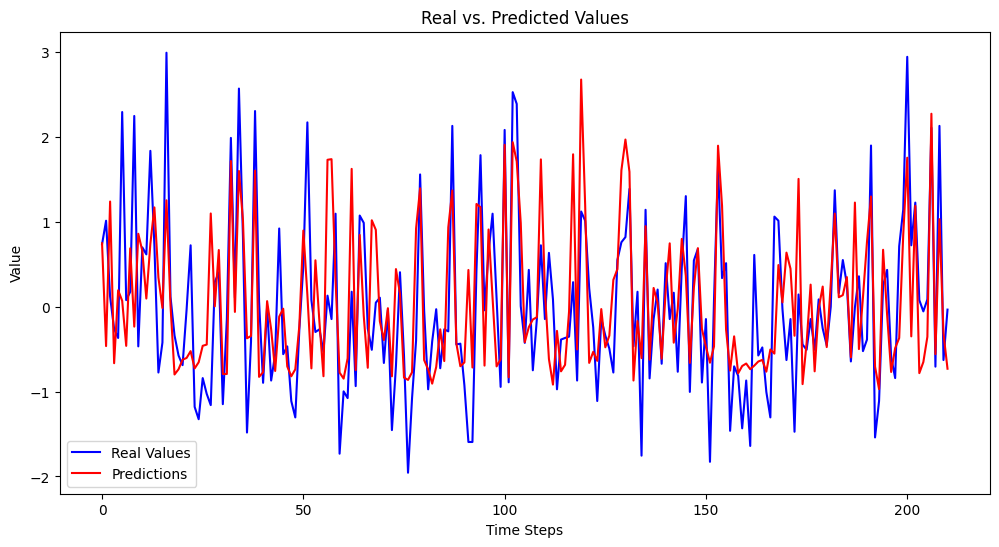

In [ ]:
import matplotlib.pyplot as plt

# Make predictions on the test data
predictions = model.predict(test_X)

# Plot the predictions and real values
plt.figure(figsize=(12, 6))
plt.plot(test_y, label='Real Values', color='blue')
plt.plot(predictions, label='Predictions', color='red')
plt.xlabel('Time Steps')
plt.ylabel('Value')
plt.title('Real vs. Predicted Values')
plt.legend()
plt.show()
